In [1]:
"""
Usage details:
Step 1: Get preprocessed data using get_data.sh script.
    a. Verify that all the files in a particular directory have valid content.
       If some file doesn't have complete data then the script will output empty data.
    b. Run the script like "get_data.sh file.txt num_cores is_shared". is_shared is 1 if
       the results are for shared llc, 0 otherwise. This has to be done for each file.
       for FILE in *; do get_data.sh file.txt num_cores is_shared; done
    c. The above step will generate file_preprocessed.txt in a folder named "preprocessed_results" 
    for different file_names. Move the results in the desired place.
Step 2:
    a. List the two data points to compare and corresponding directories.
    b. Get the processed_data for each file for each of the two data points.
       Signature : process_file(file, num_core)
       Data point structure:
       For each data point(e.g."shared", "sliced"):
       [ [(sim_inst_count, cpu_data)] for each file in a data point]
       cpu_data structure
       [(global_mpki, ipc, cache_data) for each cpu]
       cache_data structure:
       [[total_access, hit, miss, mpki] for each cache] : 4x4
    c. Use the processed data as needed.
"""

'\nUsage details:\nStep 1: Get preprocessed data using get_data.sh script.\n    a. Verify that all the files in a particular directory have valid content.\n       If some file doesn\'t have complete data then the script will output empty data.\n    b. Run the script like "get_data.sh file.txt num_cores is_shared". is_shared is 1 if\n       the results are for shared llc, 0 otherwise. This has to be done for each file.\n       for FILE in *; do get_data.sh file.txt num_cores is_shared; done\n    c. The above step will generate file_preprocessed.txt in a folder named "preprocessed_results" \n    for different file_names. Move the results in the desired place.\nStep 2:\n    a. List the two data points to compare and corresponding directories.\n    b. Get the processed_data for each file for each of the two data points.\n       Signature : process_file(file, num_core)\n       Data point structure:\n       For each data point(e.g."shared", "sliced"):\n       [ [(sim_inst_count, cpu_data)] f

In [2]:
def add(l1,l2):
    temp = []
    for i in range(0,len(l1)):
        temp.append(l1[i]+l2[i])
    return temp

In [3]:
def find_labels1(x):
    temp = []
    for i in range(len(x)):
        a = x[i].split('_')[0]
        temp.append(a.split('-')[0] + '(' +  a + ')')
        
    return temp

In [4]:
def find_labels2(x):
    
    temp = [] 
    for i in range(len(x)):
        a = x[i].split('_')[0]
        temp.append(a.split('-')[1] + '(' +  a + ')')
        
    return temp

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import os

In [8]:
os.listdir()

['gcc-perl_shared',
 'bwaves-omen_sliced',
 'mcf-cactu_sliced',
 'process_data2.py',
 'gcc-perl_sliced',
 '.ipynb_checkpoints',
 'plot_results.ipynb',
 'bwaves-omen_shared',
 'process_data1.py',
 'mcf-cactu_shared']

In [9]:
from process_data1 import process_file1
from process_data2 import process_file2

In [10]:
gp_shared_dir = "gcc-perl_shared"
gp_sliced_dir = "gcc-perl_sliced"
mc_shared_dir = "mcf-cactu_shared"
mc_sliced_dir = "mcf-cactu_sliced"
bo_shared_dir = "bwaves-omen_shared"
bo_sliced_dir = "bwaves-omen_sliced"

"""
The processed files must be defined manually like :
shared_preprocessed_files = ["file1.txt", "file2.txt", ...].

The result will be in the same order as the files.
""" 

gp_shared_preprocessed_files = os.listdir(gp_shared_dir)

gp_sliced_preprocessed_files = os.listdir(gp_sliced_dir)


mc_shared_preprocessed_files = os.listdir(mc_shared_dir)

mc_sliced_preprocessed_files = os.listdir(mc_sliced_dir)


bo_shared_preprocessed_files = os.listdir(bo_shared_dir)

bo_sliced_preprocessed_files = os.listdir(bo_sliced_dir)


In [11]:
gp_shared_preprocessed_files.sort()
mc_shared_preprocessed_files.sort()
bo_shared_preprocessed_files.sort()

In [12]:
mc_shared_preprocessed_files

['core2_2mb_mcf-cactu_shared_preprocessed.txt',
 'core2_4mb_mcf-cactu_shared_preprocessed.txt',
 'core2_8mb_mcf-cactu_shared_preprocessed.txt',
 'zcore2_16mb_mcf-cactu_shared_preprocessed.txt']

In [13]:
gp_sliced_preprocessed_files.sort()
mc_sliced_preprocessed_files.sort()
bo_sliced_preprocessed_files.sort()



In [14]:
gp_sliced_preprocessed_files

['gcc-perl_i5_2mb_preprocessed.txt',
 'gcc-perl_i5_4mb_preprocessed.txt',
 'gcc-perl_i5_8mb_preprocessed.txt',
 'zgcc-perl_i5_16mb_preprocessed.txt']

In [15]:
gp_shared_preprocessed_result = []
for file in gp_shared_preprocessed_files:
    file_path = os.path.join(gp_shared_dir, file)
    sim_inst_count, cpu_data = process_file2(file_path, 2)
    gp_shared_preprocessed_result.append((sim_inst_count, cpu_data))
    
mc_shared_preprocessed_result = []
for file in mc_shared_preprocessed_files:
    file_path = os.path.join(mc_shared_dir, file)
    sim_inst_count, cpu_data = process_file2(file_path, 2)
    mc_shared_preprocessed_result.append((sim_inst_count, cpu_data))

    
bo_shared_preprocessed_result = []
for file in bo_shared_preprocessed_files:
    file_path = os.path.join(bo_shared_dir, file)
    sim_inst_count, cpu_data = process_file2(file_path, 2)
    bo_shared_preprocessed_result.append((sim_inst_count, cpu_data))



In [16]:
gp_sliced_preprocessed_result = []
for file in gp_sliced_preprocessed_files:
    file_path = os.path.join(gp_sliced_dir, file)
    sim_inst_count, cpu_data = process_file1(file_path, 2)
    gp_sliced_preprocessed_result.append((sim_inst_count, cpu_data))

    
mc_sliced_preprocessed_result = []
for file in mc_sliced_preprocessed_files:
    file_path = os.path.join(mc_sliced_dir, file)
    sim_inst_count, cpu_data = process_file1(file_path, 2)
    mc_sliced_preprocessed_result.append((sim_inst_count, cpu_data))

    
bo_sliced_preprocessed_result = []
for file in bo_sliced_preprocessed_files:
    file_path = os.path.join(bo_sliced_dir, file)
    sim_inst_count, cpu_data = process_file1(file_path, 2)
    bo_sliced_preprocessed_result.append((sim_inst_count, cpu_data))


19.5715
6.39783
19.5715
6.38484
19.5716
6.36942
19.5716
6.27805
2.29487
0.00356529
2.29487
0.00356542
2.29487
0.00356437
2.29487
0.0035472
46.295
12.0475
46.3042
12.0475
46.392
12.0475
46.4826
12.0475


In [17]:
gp_sliced = {'INST': 0}
gp_shared = {'INST' : 0}

mc_sliced = {'INST': 0}
mc_shared = {'INST' : 0}

bo_sliced = {'INST': 0}
bo_shared = {'INST' : 0}

In [18]:
sliced_fields = {'MPKI','L2_ACCESS', 'L2_MISS', 'L2_HIT', 'LLC0_ACCESS', 'LLC0_MISS','LLC0_HIT' , 'LLC1_ACCESS', 'LLC1_MISS','LLC1_HIT','LLC1_MPKI','LLC0_MPKI','L2_MPKI'  }
shared_fields = {'MPKI','L2_ACCESS', 'L2_MISS', 'L2_HIT', 'LLC_ACCESS', 'LLC_MISS','LLC_HIT','L2_MPKI', 'LLC_MPKI'  }

In [19]:
mc_sliced_preprocessed_result[0][0]

100000000

In [20]:
for i in sliced_fields:
    
    gp_sliced['C0_'+i] = 0
    gp_sliced['C1_'+i] = 0
    
for i in shared_fields:
    
    gp_shared['C0_'+i] = 0
    gp_shared['C1_'+i] = 0
    
for i in sliced_fields:
    
    mc_sliced['C0_'+i] = 0
    mc_sliced['C1_'+i] = 0
    
for i in shared_fields:
    
    mc_shared['C0_'+i] = 0
    mc_shared['C1_'+i] = 0
    
for i in sliced_fields:
    
    bo_sliced['C0_'+i] = 0
    bo_sliced['C1_'+i] = 0
    
for i in shared_fields:
    
    bo_shared['C0_'+i] = 0
    bo_shared['C1_'+i] = 0

In [21]:
def fun(dic, label):
    temp = []
    
    for i in range(len(dic)):
        temp.append(dic[i][label])
        
    return temp

In [22]:
len(gp_sliced_preprocessed_result)

4

In [23]:
gp_sliced_lis = []
gp_shared_lis = []
for i in range(0,len(gp_sliced_preprocessed_result)):
    temp1 = gp_sliced.copy()
    temp2 = gp_shared.copy()
    gp_sliced_lis.append(temp1)
    gp_shared_lis.append(temp2)
    
mc_sliced_lis = []
mc_shared_lis = []
for i in range(0,len(mc_sliced_preprocessed_result)):
    temp1 = mc_sliced.copy()
    temp2 = mc_shared.copy()
    mc_sliced_lis.append(temp1)
    mc_shared_lis.append(temp2)
    
bo_sliced_lis = []
bo_shared_lis = []
for i in range(0,len(bo_sliced_preprocessed_result)):
    temp1 = bo_sliced.copy()
    temp2 = bo_shared.copy()
    bo_sliced_lis.append(temp1)
    bo_shared_lis.append(temp2)

In [24]:
bo_shared_lis

[{'INST': 0,
  'C0_LLC_HIT': 0,
  'C1_LLC_HIT': 0,
  'C0_L2_HIT': 0,
  'C1_L2_HIT': 0,
  'C0_LLC_ACCESS': 0,
  'C1_LLC_ACCESS': 0,
  'C0_L2_MISS': 0,
  'C1_L2_MISS': 0,
  'C0_L2_MPKI': 0,
  'C1_L2_MPKI': 0,
  'C0_LLC_MISS': 0,
  'C1_LLC_MISS': 0,
  'C0_LLC_MPKI': 0,
  'C1_LLC_MPKI': 0,
  'C0_L2_ACCESS': 0,
  'C1_L2_ACCESS': 0,
  'C0_MPKI': 0,
  'C1_MPKI': 0},
 {'INST': 0,
  'C0_LLC_HIT': 0,
  'C1_LLC_HIT': 0,
  'C0_L2_HIT': 0,
  'C1_L2_HIT': 0,
  'C0_LLC_ACCESS': 0,
  'C1_LLC_ACCESS': 0,
  'C0_L2_MISS': 0,
  'C1_L2_MISS': 0,
  'C0_L2_MPKI': 0,
  'C1_L2_MPKI': 0,
  'C0_LLC_MISS': 0,
  'C1_LLC_MISS': 0,
  'C0_LLC_MPKI': 0,
  'C1_LLC_MPKI': 0,
  'C0_L2_ACCESS': 0,
  'C1_L2_ACCESS': 0,
  'C0_MPKI': 0,
  'C1_MPKI': 0},
 {'INST': 0,
  'C0_LLC_HIT': 0,
  'C1_LLC_HIT': 0,
  'C0_L2_HIT': 0,
  'C1_L2_HIT': 0,
  'C0_LLC_ACCESS': 0,
  'C1_LLC_ACCESS': 0,
  'C0_L2_MISS': 0,
  'C1_L2_MISS': 0,
  'C0_L2_MPKI': 0,
  'C1_L2_MPKI': 0,
  'C0_LLC_MISS': 0,
  'C1_LLC_MISS': 0,
  'C0_LLC_MPKI': 0,
  'C1_LLC

In [25]:
for i in range(0,len(gp_sliced_lis)):
    gp_sliced_lis[i]['INST'] =  gp_sliced_preprocessed_result[i][0]
    gp_sliced_lis[i]['C0_L2_MISS'] = gp_sliced_preprocessed_result[i][1][0][2][2][2]
    gp_sliced_lis[i]['C1_L2_MISS']=  gp_sliced_preprocessed_result[i][1][1][2][2][2]
    gp_sliced_lis[i]['C0_L2_HIT'] =  gp_sliced_preprocessed_result[i][1][0][2][2][1]
    gp_sliced_lis[i]['C1_L2_HIT'] =  gp_sliced_preprocessed_result[i][1][1][2][2][1]
    gp_sliced_lis[i]['C0_LLC1_MISS']= gp_sliced_preprocessed_result[i][1][0][2][4][2]
    gp_sliced_lis[i]['C1_LLC1_MISS'] =  gp_sliced_preprocessed_result[i][1][1][2][4][2]
    gp_sliced_lis[i]['C0_LLC0_ACCESS'] = gp_sliced_preprocessed_result[i][1][0][2][3][0]
    gp_sliced_lis[i]['C1_LLC0_ACCESS'] =  gp_sliced_preprocessed_result[i][1][1][2][3][0]
    gp_sliced_lis[i]['C0_LLC1_HIT'] = gp_sliced_preprocessed_result[i][1][0][2][4][1]
    gp_sliced_lis[i]['C1_LLC1_HIT'] = gp_sliced_preprocessed_result[i][1][1][2][4][1]
    gp_sliced_lis[i]['C0_IPC']=  gp_sliced_preprocessed_result[i][1][0][1]
    gp_sliced_lis[i]['C1_IPC'] = gp_sliced_preprocessed_result[i][1][1][1]
    gp_sliced_lis[i]['C0_MPKI']=  gp_sliced_preprocessed_result[i][1][0][0]
    gp_sliced_lis[i]['C1_MPKI'] = gp_sliced_preprocessed_result[i][1][1][0]
    gp_sliced_lis[i]['C0_LLC0_MISS'] = gp_sliced_preprocessed_result[i][1][0][2][3][2]
    gp_sliced_lis[i]['C1_LLC0_MISS'] = gp_sliced_preprocessed_result[i][1][1][2][3][2]
    gp_sliced_lis[i]['C0_LLC1_ACCESS'] = gp_sliced_preprocessed_result[i][1][0][2][4][0]
    gp_sliced_lis[i]['C1_LLC1_ACCESS'] =  gp_sliced_preprocessed_result[i][1][1][2][4][0]
    gp_sliced_lis[i]['C0_L2_ACCESS'] =  gp_sliced_preprocessed_result[i][1][0][2][2][0]
    gp_sliced_lis[i]['C1_L2_ACCESS'] =  gp_sliced_preprocessed_result[i][1][1][2][2][0]
    gp_sliced_lis[i]['C0_LLC0_HIT']  = gp_sliced_preprocessed_result[i][1][0][2][3][1]
    gp_sliced_lis[i]['C1_LLC0_HIT']  = gp_sliced_preprocessed_result[i][1][1][2][3][1]
    gp_sliced_lis[i]['C0_LLC1_MPKI'] = gp_sliced_preprocessed_result[i][1][0][2][4][3]
    gp_sliced_lis[i]['C1_LLC1_MPKI'] = gp_sliced_preprocessed_result[i][1][1][2][4][3]
    gp_sliced_lis[i]['C0_L2_MPKI'] =  gp_sliced_preprocessed_result[i][1][0][2][2][3]
    gp_sliced_lis[i]['C1_L2_MPKI'] =  gp_sliced_preprocessed_result[i][1][1][2][2][3]
    
for i in range(0,len(mc_sliced_lis)):
    mc_sliced_lis[i]['INST'] =  mc_sliced_preprocessed_result[i][0]
    mc_sliced_lis[i]['C0_L2_MISS'] = mc_sliced_preprocessed_result[i][1][0][2][2][2]
    mc_sliced_lis[i]['C1_L2_MISS']=  mc_sliced_preprocessed_result[i][1][1][2][2][2]
    mc_sliced_lis[i]['C0_L2_HIT'] =  mc_sliced_preprocessed_result[i][1][0][2][2][1]
    mc_sliced_lis[i]['C1_L2_HIT'] =  mc_sliced_preprocessed_result[i][1][1][2][2][1]
    mc_sliced_lis[i]['C0_LLC1_MISS']= mc_sliced_preprocessed_result[i][1][0][2][4][2]
    mc_sliced_lis[i]['C1_LLC1_MISS'] =  mc_sliced_preprocessed_result[i][1][1][2][4][2]
    mc_sliced_lis[i]['C0_LLC0_ACCESS'] = mc_sliced_preprocessed_result[i][1][0][2][3][0]
    mc_sliced_lis[i]['C1_LLC0_ACCESS'] =  mc_sliced_preprocessed_result[i][1][1][2][3][0]
    mc_sliced_lis[i]['C0_LLC1_HIT'] = mc_sliced_preprocessed_result[i][1][0][2][4][1]
    mc_sliced_lis[i]['C1_LLC1_HIT'] = mc_sliced_preprocessed_result[i][1][1][2][4][1]
    mc_sliced_lis[i]['C0_IPC']=  mc_sliced_preprocessed_result[i][1][0][1]
    mc_sliced_lis[i]['C1_IPC'] = mc_sliced_preprocessed_result[i][1][1][1]
    mc_sliced_lis[i]['C0_MPKI']=  mc_sliced_preprocessed_result[i][1][0][0]
    mc_sliced_lis[i]['C1_MPKI'] = mc_sliced_preprocessed_result[i][1][1][0]
    mc_sliced_lis[i]['C0_LLC0_MISS'] = mc_sliced_preprocessed_result[i][1][0][2][3][2]
    mc_sliced_lis[i]['C1_LLC0_MISS'] = mc_sliced_preprocessed_result[i][1][1][2][3][2]
    mc_sliced_lis[i]['C0_LLC1_ACCESS'] = mc_sliced_preprocessed_result[i][1][0][2][4][0]
    mc_sliced_lis[i]['C1_LLC1_ACCESS'] =  mc_sliced_preprocessed_result[i][1][1][2][4][0]
    mc_sliced_lis[i]['C0_L2_ACCESS'] =  mc_sliced_preprocessed_result[i][1][0][2][2][0]
    mc_sliced_lis[i]['C1_L2_ACCESS'] =  mc_sliced_preprocessed_result[i][1][1][2][2][0]
    mc_sliced_lis[i]['C0_LLC0_HIT']  = mc_sliced_preprocessed_result[i][1][0][2][3][1]
    mc_sliced_lis[i]['C1_LLC0_HIT']  = mc_sliced_preprocessed_result[i][1][1][2][3][1]
    mc_sliced_lis[i]['C0_LLC1_MPKI'] = mc_sliced_preprocessed_result[i][1][0][2][4][3]
    mc_sliced_lis[i]['C1_LLC1_MPKI'] = mc_sliced_preprocessed_result[i][1][1][2][4][3]
    mc_sliced_lis[i]['C0_L2_MPKI'] =  mc_sliced_preprocessed_result[i][1][0][2][2][3]
    mc_sliced_lis[i]['C1_L2_MPKI'] =  mc_sliced_preprocessed_result[i][1][1][2][2][3]
    
    
for i in range(0,len(bo_sliced_lis)):
    bo_sliced_lis[i]['INST'] =  bo_sliced_preprocessed_result[i][0]
    bo_sliced_lis[i]['C0_L2_MISS'] = bo_sliced_preprocessed_result[i][1][0][2][2][2]
    bo_sliced_lis[i]['C1_L2_MISS']=  bo_sliced_preprocessed_result[i][1][1][2][2][2]
    bo_sliced_lis[i]['C0_L2_HIT'] =  bo_sliced_preprocessed_result[i][1][0][2][2][1]
    bo_sliced_lis[i]['C1_L2_HIT'] =  bo_sliced_preprocessed_result[i][1][1][2][2][1]
    bo_sliced_lis[i]['C0_LLC1_MISS']= bo_sliced_preprocessed_result[i][1][0][2][4][2]
    bo_sliced_lis[i]['C1_LLC1_MISS'] =  bo_sliced_preprocessed_result[i][1][1][2][4][2]
    bo_sliced_lis[i]['C0_LLC0_ACCESS'] = bo_sliced_preprocessed_result[i][1][0][2][3][0]
    bo_sliced_lis[i]['C1_LLC0_ACCESS'] =  bo_sliced_preprocessed_result[i][1][1][2][3][0]
    bo_sliced_lis[i]['C0_LLC1_HIT'] = bo_sliced_preprocessed_result[i][1][0][2][4][1]
    bo_sliced_lis[i]['C1_LLC1_HIT'] = bo_sliced_preprocessed_result[i][1][1][2][4][1]
    bo_sliced_lis[i]['C0_IPC']=  bo_sliced_preprocessed_result[i][1][0][1]
    bo_sliced_lis[i]['C1_IPC'] = bo_sliced_preprocessed_result[i][1][1][1]
    bo_sliced_lis[i]['C0_MPKI']=  bo_sliced_preprocessed_result[i][1][0][0]
    bo_sliced_lis[i]['C1_MPKI'] = bo_sliced_preprocessed_result[i][1][1][0]
    bo_sliced_lis[i]['C0_LLC0_MISS'] = bo_sliced_preprocessed_result[i][1][0][2][3][2]
    bo_sliced_lis[i]['C1_LLC0_MISS'] = bo_sliced_preprocessed_result[i][1][1][2][3][2]
    bo_sliced_lis[i]['C0_LLC1_ACCESS'] = bo_sliced_preprocessed_result[i][1][0][2][4][0]
    bo_sliced_lis[i]['C1_LLC1_ACCESS'] =  bo_sliced_preprocessed_result[i][1][1][2][4][0]
    bo_sliced_lis[i]['C0_L2_ACCESS'] =  bo_sliced_preprocessed_result[i][1][0][2][2][0]
    bo_sliced_lis[i]['C1_L2_ACCESS'] =  bo_sliced_preprocessed_result[i][1][1][2][2][0]
    bo_sliced_lis[i]['C0_LLC0_HIT']  = bo_sliced_preprocessed_result[i][1][0][2][3][1]
    bo_sliced_lis[i]['C1_LLC0_HIT']  = bo_sliced_preprocessed_result[i][1][1][2][3][1]
    bo_sliced_lis[i]['C0_LLC1_MPKI'] = bo_sliced_preprocessed_result[i][1][0][2][4][3]
    bo_sliced_lis[i]['C1_LLC1_MPKI'] = bo_sliced_preprocessed_result[i][1][1][2][4][3]
    bo_sliced_lis[i]['C0_L2_MPKI'] =  bo_sliced_preprocessed_result[i][1][0][2][2][3]
    bo_sliced_lis[i]['C1_L2_MPKI'] =  bo_sliced_preprocessed_result[i][1][1][2][2][3]

In [26]:
for i in range(0,len(mc_shared_lis)):
    mc_shared_lis[i]['INST'] =  mc_shared_preprocessed_result[i][0]
    mc_shared_lis[i]['C0_L2_MISS'] = mc_shared_preprocessed_result[i][1][0][2][2][2]
    mc_shared_lis[i]['C1_L2_MISS']=  mc_shared_preprocessed_result[i][1][1][2][2][2]
    mc_shared_lis[i]['C0_L2_HIT'] =  mc_shared_preprocessed_result[i][1][0][2][2][1]
    mc_shared_lis[i]['C1_L2_HIT'] =  mc_shared_preprocessed_result[i][1][1][2][2][1]
    mc_shared_lis[i]['C0_LLC_MISS']= mc_shared_preprocessed_result[i][1][0][2][3][2]
    mc_shared_lis[i]['C1_LLC_MISS'] =  mc_shared_preprocessed_result[i][1][1][2][3][2]
    mc_shared_lis[i]['C0_LLC_HIT'] = mc_shared_preprocessed_result[i][1][0][2][3][1]
    mc_shared_lis[i]['C1_LLC_HIT'] = mc_shared_preprocessed_result[i][1][1][2][3][1]
    mc_shared_lis[i]['C0_IPC']=  mc_shared_preprocessed_result[i][1][0][1]
    mc_shared_lis[i]['C1_IPC'] = mc_shared_preprocessed_result[i][1][1][1]
    mc_shared_lis[i]['C0_MPKI']=  mc_shared_preprocessed_result[i][1][0][0]
    mc_shared_lis[i]['C1_MPKI'] = mc_shared_preprocessed_result[i][1][1][0]
    mc_shared_lis[i]['C0_LLC_ACCESS'] = mc_shared_preprocessed_result[i][1][0][2][3][0]
    mc_shared_lis[i]['C1_LLC_ACCESS'] =  mc_shared_preprocessed_result[i][1][1][2][3][0]
    mc_shared_lis[i]['C0_L2_ACCESS'] =  mc_shared_preprocessed_result[i][1][0][2][2][0]
    mc_shared_lis[i]['C1_L2_ACCESS'] =  mc_shared_preprocessed_result[i][1][1][2][2][0]
    mc_shared_lis[i]['C0_LLC_MPKI'] = mc_shared_preprocessed_result[i][1][0][2][3][3]
    mc_shared_lis[i]['C1_LLC_MPKI'] = mc_shared_preprocessed_result[i][1][1][2][3][3]
    mc_shared_lis[i]['C0_L2_MPKI'] =  mc_shared_preprocessed_result[i][1][0][2][2][3]
    mc_shared_lis[i]['C1_L2_MPKI'] =  mc_shared_preprocessed_result[i][1][1][2][2][3]
    
    
for i in range(0,len(gp_shared_lis)):
    gp_shared_lis[i]['INST'] =  gp_shared_preprocessed_result[i][0]
    gp_shared_lis[i]['C0_L2_MISS'] = gp_shared_preprocessed_result[i][1][0][2][2][2]
    gp_shared_lis[i]['C1_L2_MISS']=  gp_shared_preprocessed_result[i][1][1][2][2][2]
    gp_shared_lis[i]['C0_L2_HIT'] =  gp_shared_preprocessed_result[i][1][0][2][2][1]
    gp_shared_lis[i]['C1_L2_HIT'] =  gp_shared_preprocessed_result[i][1][1][2][2][1]
    gp_shared_lis[i]['C0_LLC_MISS']= gp_shared_preprocessed_result[i][1][0][2][3][2]
    gp_shared_lis[i]['C1_LLC_MISS'] =  gp_shared_preprocessed_result[i][1][1][2][3][2]
    gp_shared_lis[i]['C0_LLC_HIT'] = gp_shared_preprocessed_result[i][1][0][2][3][1]
    gp_shared_lis[i]['C1_LLC_HIT'] = gp_shared_preprocessed_result[i][1][1][2][3][1]
    gp_shared_lis[i]['C0_IPC']=  gp_shared_preprocessed_result[i][1][0][1]
    gp_shared_lis[i]['C1_IPC'] = gp_shared_preprocessed_result[i][1][1][1]
    gp_shared_lis[i]['C0_MPKI']=  gp_shared_preprocessed_result[i][1][0][0]
    gp_shared_lis[i]['C1_MPKI'] = gp_shared_preprocessed_result[i][1][1][0]
    gp_shared_lis[i]['C0_LLC_ACCESS'] = gp_shared_preprocessed_result[i][1][0][2][3][0]
    gp_shared_lis[i]['C1_LLC_ACCESS'] =  gp_shared_preprocessed_result[i][1][1][2][3][0]
    gp_shared_lis[i]['C0_L2_ACCESS'] =  gp_shared_preprocessed_result[i][1][0][2][2][0]
    gp_shared_lis[i]['C1_L2_ACCESS'] =  gp_shared_preprocessed_result[i][1][1][2][2][0]
    gp_shared_lis[i]['C0_LLC_MPKI'] = gp_shared_preprocessed_result[i][1][0][2][3][3]
    gp_shared_lis[i]['C1_LLC_MPKI'] = gp_shared_preprocessed_result[i][1][1][2][3][3]
    gp_shared_lis[i]['C0_L2_MPKI'] =  gp_shared_preprocessed_result[i][1][0][2][2][3]
    gp_shared_lis[i]['C1_L2_MPKI'] =  gp_shared_preprocessed_result[i][1][1][2][2][3]
    
for i in range(0,len(bo_shared_lis)):
    bo_shared_lis[i]['INST'] =  bo_shared_preprocessed_result[i][0]
    bo_shared_lis[i]['C0_L2_MISS'] = bo_shared_preprocessed_result[i][1][0][2][2][2]
    bo_shared_lis[i]['C1_L2_MISS']=  bo_shared_preprocessed_result[i][1][1][2][2][2]
    bo_shared_lis[i]['C0_L2_HIT'] =  bo_shared_preprocessed_result[i][1][0][2][2][1]
    bo_shared_lis[i]['C1_L2_HIT'] =  bo_shared_preprocessed_result[i][1][1][2][2][1]
    bo_shared_lis[i]['C0_LLC_MISS']= bo_shared_preprocessed_result[i][1][0][2][3][2]
    bo_shared_lis[i]['C1_LLC_MISS'] =  bo_shared_preprocessed_result[i][1][1][2][3][2]
    bo_shared_lis[i]['C0_LLC_HIT'] = bo_shared_preprocessed_result[i][1][0][2][3][1]
    bo_shared_lis[i]['C1_LLC_HIT'] = bo_shared_preprocessed_result[i][1][1][2][3][1]
    bo_shared_lis[i]['C0_IPC']=  bo_shared_preprocessed_result[i][1][0][1]
    bo_shared_lis[i]['C1_IPC'] = bo_shared_preprocessed_result[i][1][1][1]
    bo_shared_lis[i]['C0_MPKI']=  bo_shared_preprocessed_result[i][1][0][0]
    bo_shared_lis[i]['C1_MPKI'] = bo_shared_preprocessed_result[i][1][1][0]
    bo_shared_lis[i]['C0_LLC_ACCESS'] = bo_shared_preprocessed_result[i][1][0][2][3][0]
    bo_shared_lis[i]['C1_LLC_ACCESS'] =  bo_shared_preprocessed_result[i][1][1][2][3][0]
    bo_shared_lis[i]['C0_L2_ACCESS'] =  bo_shared_preprocessed_result[i][1][0][2][2][0]
    bo_shared_lis[i]['C1_L2_ACCESS'] =  bo_shared_preprocessed_result[i][1][1][2][2][0]
    bo_shared_lis[i]['C0_LLC_MPKI'] = bo_shared_preprocessed_result[i][1][0][2][3][3]
    bo_shared_lis[i]['C1_LLC_MPKI'] = bo_shared_preprocessed_result[i][1][1][2][3][3]
    bo_shared_lis[i]['C0_L2_MPKI'] =  bo_shared_preprocessed_result[i][1][0][2][2][3]
    bo_shared_lis[i]['C1_L2_MPKI'] =  bo_shared_preprocessed_result[i][1][1][2][2][3]

In [27]:
bo_sliced_lis

[{'INST': 100000000,
  'C0_LLC0_ACCESS': 867442,
  'C1_LLC0_ACCESS': 1020231,
  'C0_L2_HIT': 110,
  'C1_L2_HIT': 1459399,
  'C0_L2_MISS': 1727877,
  'C1_L2_MISS': 1369359,
  'C0_LLC1_MPKI': 8.60272,
  'C1_LLC1_MPKI': 7.66794,
  'C0_L2_MPKI': 17.27877,
  'C1_L2_MPKI': 13.69359,
  'C0_LLC1_ACCESS': 860436,
  'C1_LLC1_ACCESS': 1016582,
  'C0_LLC1_MISS': 860272,
  'C1_LLC1_MISS': 766794,
  'C0_LLC0_MISS': 867326,
  'C1_LLC0_MISS': 766690,
  'C0_LLC0_HIT': 116,
  'C1_LLC0_HIT': 253541,
  'C0_L2_ACCESS': 1727987,
  'C1_L2_ACCESS': 2828758,
  'C0_MPKI': 46.295,
  'C1_MPKI': 12.0475,
  'C0_LLC1_HIT': 164,
  'C1_LLC1_HIT': 249788,
  'C0_LLC0_MPKI': 0,
  'C1_LLC0_MPKI': 0,
  'C0_IPC': 0.990625,
  'C1_IPC': 0.351368},
 {'INST': 100000000,
  'C0_LLC0_ACCESS': 863824,
  'C1_LLC0_ACCESS': 1020691,
  'C0_L2_HIT': 108,
  'C1_L2_HIT': 1459158,
  'C0_L2_MISS': 1727883,
  'C1_L2_MISS': 1369854,
  'C0_LLC1_MPKI': 8.63798,
  'C1_LLC1_MPKI': 6.1512,
  'C0_L2_MPKI': 17.27883,
  'C1_L2_MPKI': 13.69854,
  'C0_

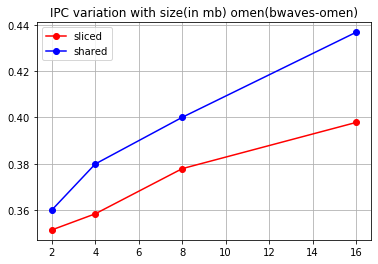

In [46]:
x=[2,4,8,16]
plt.title('IPC variation with size(in mb) omen(bwaves-omen)')
plt.plot(x,fun(bo_sliced_lis,'C1_IPC'), 'r' ,marker='o',label="sliced")
plt.plot(x,fun(bo_shared_lis,'C1_IPC'), 'b' ,marker='o',label='shared')
plt.grid()
plt.legend(loc='best')
plt.show()

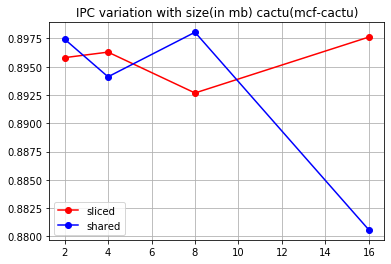

In [48]:
x=[2,4,8,16]
plt.title('IPC variation with size(in mb) cactu(mcf-cactu)')

temp = fun(mc_sliced_lis,'C1_IPC')
#temp[3]=0.20
plt.plot(x,temp, 'r' ,marker='o',label="sliced")

plt.plot(x,fun(mc_shared_lis,'C1_IPC'), 'b' ,marker='o',label='shared')
plt.grid()
plt.legend(loc='best')
plt.show()

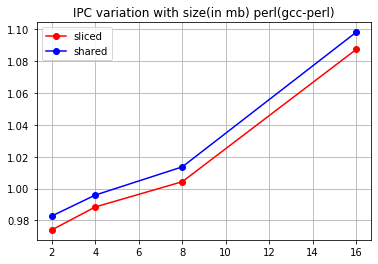

In [49]:
x=[2,4,8,16]
plt.title('IPC variation with size(in mb) perl(gcc-perl)')
plt.plot(x,fun(gp_sliced_lis,'C1_IPC'), 'r' ,marker='o',label="sliced")
plt.plot(x,fun(gp_shared_lis,'C1_IPC'), 'b' ,marker='o',label='shared')
plt.grid()
plt.legend(loc='best')
plt.show()

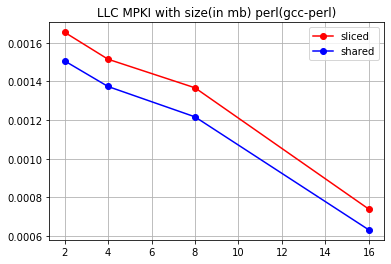

In [44]:
x=[2,4,8,16]
plt.title('LLC MPKI with size(in mb) perl(gcc-perl)')

res = [i / j for i, j in zip(add(fun(gp_sliced_lis,'C1_LLC1_MISS') ,fun(gp_sliced_lis,'C1_LLC0_MISS') ), fun(gp_sliced_lis,'INST'))]

plt.plot(x,res, 'r' ,marker='o',label="sliced")

res = [i / j for i, j in zip(fun(gp_shared_lis,'C1_LLC_MISS'), fun(gp_shared_lis,'INST'))]
plt.plot(x,res, 'b' ,marker='o',label='shared')
plt.grid()
plt.legend(loc='best')
plt.show()

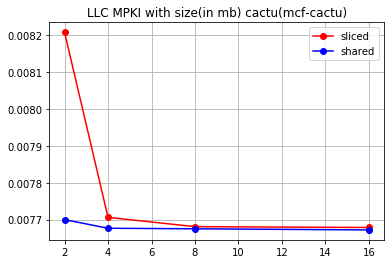

In [45]:
x=[2,4,8,16]
plt.title('LLC MPKI with size(in mb) cactu(mcf-cactu)')

res = [i / j for i, j in zip(add(fun(mc_sliced_lis,'C1_LLC1_MISS') ,fun(mc_sliced_lis,'C1_LLC0_MISS') ), fun(mc_sliced_lis,'INST'))]

plt.plot(x,res, 'r' ,marker='o',label="sliced")

res = [i / j for i, j in zip(fun(mc_shared_lis,'C1_LLC_MISS'), fun(mc_shared_lis,'INST'))]
plt.plot(x,res, 'b' ,marker='o',label='shared')
plt.grid()
plt.legend(loc='best')
plt.show()

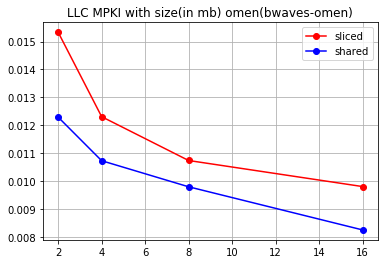

In [39]:
x=[2,4,8,16]
plt.title('LLC MPKI with size(in mb) omen(bwaves-omen)')

res = [i / j for i, j in zip(add(fun(bo_sliced_lis,'C1_LLC1_MISS') ,fun(bo_sliced_lis,'C1_LLC0_MISS') ), fun(bo_sliced_lis,'INST'))]
a = [x + 0.0000001 for x in res]
plt.plot(x,a, 'r' ,marker='o',label="sliced")

res = [i / j for i, j in zip(fun(bo_shared_lis,'C1_LLC_MISS'), fun(bo_shared_lis,'INST'))]
plt.plot(x,res, 'b' ,marker='o',label='shared')
plt.grid()
plt.legend(loc='best')
plt.show()

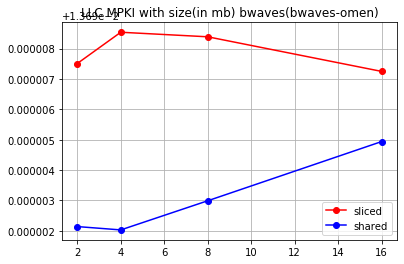

In [57]:
x=[2,4,8,16]
plt.title('LLC MPKI with size(in mb) bwaves(bwaves-omen)')

res = [i / j for i, j in zip(fun(bo_sliced_lis,'C1_L2_MISS'), fun(bo_sliced_lis,'INST'))]
#a = [x + 0.0000001 for x in res]
plt.plot(x,res, 'r' ,marker='o',label="sliced")

res = [i / j for i, j in zip(fun(bo_shared_lis,'C1_L2_MISS'), fun(bo_shared_lis,'INST'))]
plt.plot(x,res, 'b' ,marker='o',label='shared')
plt.grid()
plt.legend(loc='best')
plt.show()

In [50]:
print([i / j for i, j in zip(add(fun(bo_sliced_lis,'C0_LLC1_MISS') ,fun(bo_sliced_lis,'C0_LLC1_MISS') ), fun(bo_sliced_lis,'INST'))])

[0.01727658, 0.01727596, 0.01727596, 0.01727596]


In [43]:
print(add(fun(bo_sliced_lis,'C0_LLC1_MISS') ,fun(bo_sliced_lis,'C0_LLC1_MISS') ))

[1727658, 1727596, 1727596, 1727596]


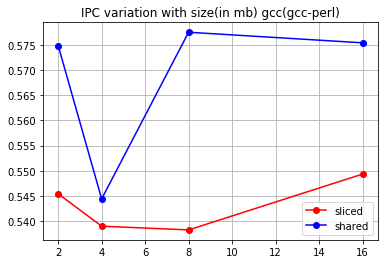

In [57]:
x=[2,4,8,16]
plt.title('IPC variation with size(in mb) gcc(gcc-perl)')

res = [i / j for i, j in zip(fun(mc_sliced_lis,'C1_LLC1_MISS'), fun(mc_sliced_lis,'C1_LLC1_ACCESS'))]
plt.plot(x,res, 'r' ,marker='o',label="sliced")

res = [i / j for i, j in zip(fun(mc_shared_lis,'C1_LLC_MISS'), fun(mc_shared_lis,'C1_LLC_ACCESS'))]
plt.plot(x,res, 'b' ,marker='o',label='shared')
plt.grid()
plt.legend(loc='best')
plt.show()

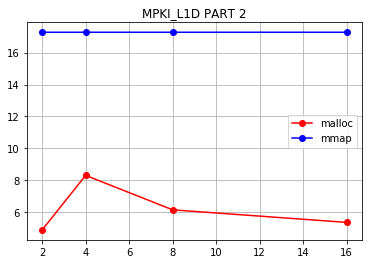

In [52]:
x=[2,4,8,16]
plt.title('MPKI_L1D PART 2')
plt.plot(x,fun(bo_sliced_lis,'C0_LLC1_MPKI'), 'r' ,marker='o',label="malloc")
plt.plot(x,fun(bo_shared_lis,'C0_LLC_MPKI'), 'b' ,marker='o',label='mmap')
plt.grid()
plt.legend(loc='best')
plt.show()

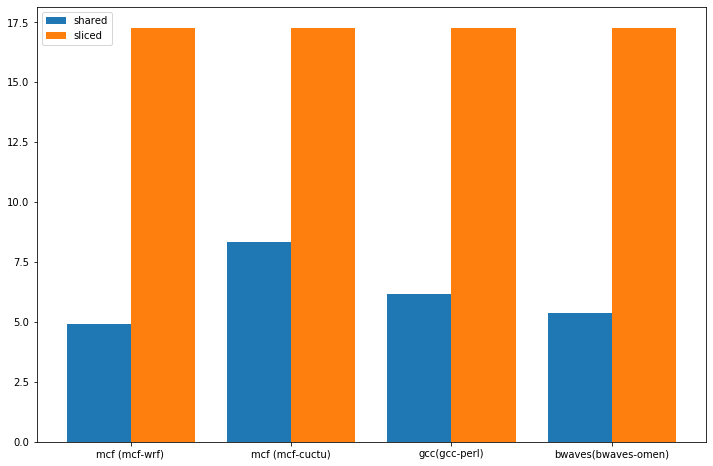

In [56]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(4)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, fun(bo_sliced_lis,'C0_LLC1_MPKI'), width=bar_width,label='shared' )
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, fun(bo_shared_lis,'C0_LLC_MPKI'), width=bar_width, label='sliced')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["mcf (mcf-wrf) ", "mcf (mcf-cuctu)", "gcc(gcc-perl)", "bwaves(bwaves-omen)"])
# Add legend.
ax.legend()

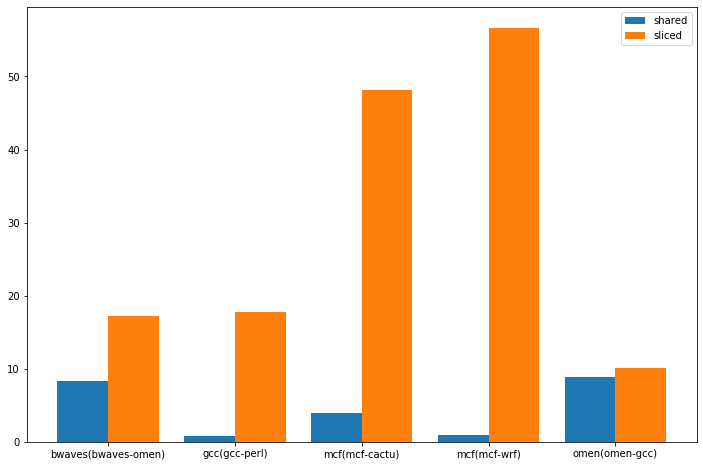

In [162]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(5)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, fun(sliced_lis,'C0_LLC1_MPKI'), width=bar_width,label='shared' )
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, fun(shared_lis,'C0_LLC_MPKI'), width=bar_width, label='sliced')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)

ax.set_xticklabels(find_labels1(shared_preprocessed_files))
# Add legend.
ax.legend()

In [115]:
shared_lis[0]['C0_L2_MPKI']

17.2788

In [148]:
x ="sas_ewd".split("_")[0]

In [149]:
x

'sas'